In [ ]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import seaborn as sns
import warnings
warnings.filterwarnings("ignore")

In [ ]:
df = pd.read_csv("/content/force2020_data_unsupervised_learning.csv")

In [ ]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
0,1.884186,80.200851,494.528,NaN,20.915468,161.131180
1,1.889794,79.262886,494.680,NaN,19.383013,160.603470
2,1.896523,74.821999,494.832,NaN,22.591518,160.173615
3,1.891913,72.878922,494.984,NaN,32.191910,160.149429
4,1.880034,71.729141,495.136,NaN,38.495632,160.128342


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 18270 entries, 0 to 18269
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      18270 non-null  float64
 1   GR        18270 non-null  float64
 2   DEPTH_MD  18270 non-null  float64
 3   NPHI      14032 non-null  float64
 4   PEF       16440 non-null  float64
 5   DTC       18189 non-null  float64
dtypes: float64(6)
memory usage: 856.5 KB


In [ ]:
df.shape

(18270, 6)

In [ ]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [ ]:
df.isnull().sum()

,0
RHOB,0
GR,0
DEPTH_MD,0
NPHI,4238
PEF,1830
DTC,81


In [ ]:
df.dtypes

,0
RHOB,float64
GR,float64
DEPTH_MD,float64
NPHI,float64
PEF,float64
DTC,float64


In [ ]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,18270.000000,18270.000000,18270.000000,14032.000000,16440.000000,18189.000000
mean,2.110451,63.847477,1883.228478,0.404547,3.463851,125.106178
std,0.297725,28.636331,801.941195,0.133532,2.561239,30.618337
min,1.404576,6.191506,494.528000,0.024330,1.010027,55.726753
25%,1.963399,43.866690,1188.750000,0.315346,2.320836,90.883087
50%,2.055079,66.777851,1882.972000,0.448527,2.790249,141.300461
75%,2.381963,81.542681,2577.802000,0.506343,4.267342,148.048355
max,2.927888,499.022583,3272.024000,0.800262,66.030319,175.953140


<Axes: >

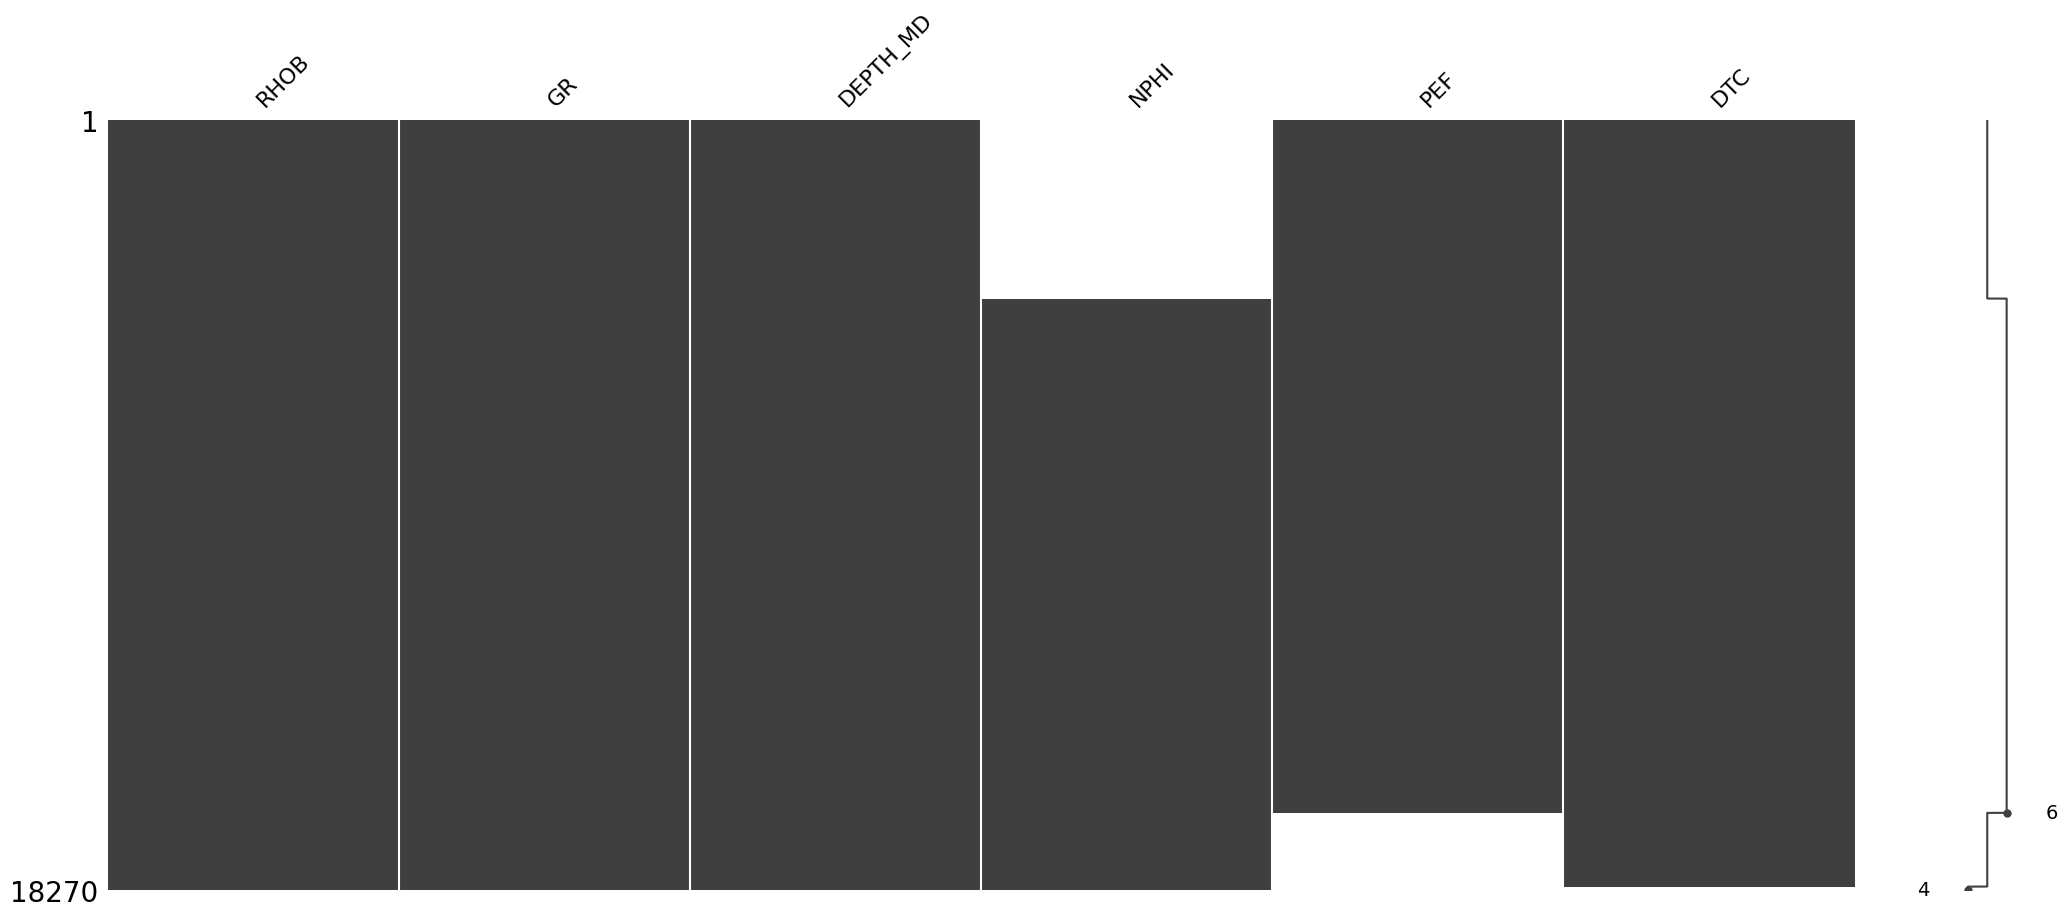

In [ ]:
import missingno as msno
msno.matrix(df)

In [ ]:
df.dropna(inplace=True)

<Axes: >

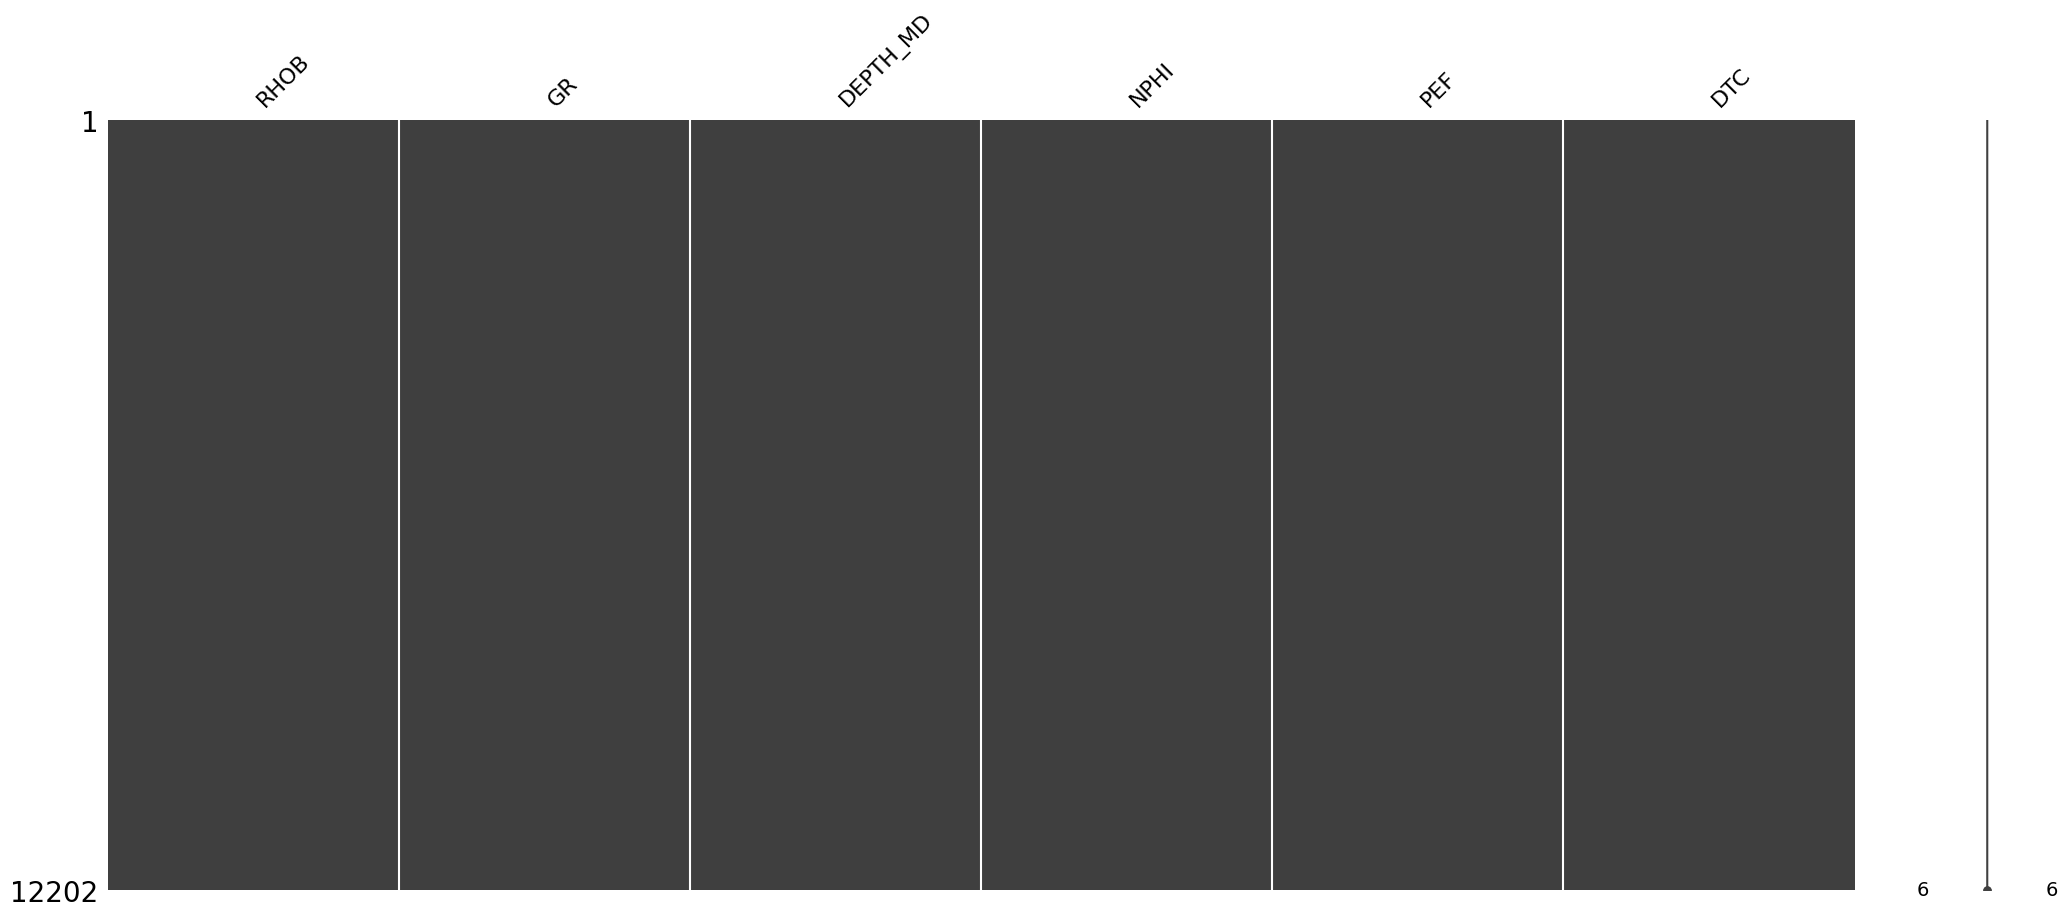

In [ ]:
msno.matrix(df)

In [ ]:
df.describe()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
count,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000,12202.000000
mean,2.149947,61.253852,2066.272839,0.414572,3.912313,121.409905
std,0.251592,29.902708,535.691815,0.139207,1.816933,30.394369
min,1.493417,6.191506,1138.704000,0.037976,1.126667,55.726753
25%,1.983767,42.792794,1602.342000,0.313797,2.629141,89.977041
50%,2.059335,62.886322,2065.980000,0.466891,3.365132,138.477173
75%,2.389839,77.726776,2530.226000,0.513840,4.686422,146.242302
max,2.889454,499.022583,2993.864000,0.800262,17.026619,163.910797


In [ ]:
df.info()

<class 'pandas.core.frame.DataFrame'>
Index: 12202 entries, 4238 to 16439
Data columns (total 6 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   RHOB      12202 non-null  float64
 1   GR        12202 non-null  float64
 2   DEPTH_MD  12202 non-null  float64
 3   NPHI      12202 non-null  float64
 4   PEF       12202 non-null  float64
 5   DTC       12202 non-null  float64
dtypes: float64(6)
memory usage: 667.3 KB


In [ ]:
df.columns

Index(['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC'], dtype='object')

In [ ]:
from sklearn.preprocessing import StandardScaler
scaler = StandardScaler()

In [ ]:
df[['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']] = scaler.fit_transform(df[['RHOB', 'GR', 'DEPTH_MD', 'NPHI', 'PEF', 'DTC']])

In [ ]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297
4242,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808


In [ ]:
from sklearn.cluster import KMeans
def optimise_k_means(data, max_k) :
    means = []
    inertias = []

    for k in range(1, max_k):
          kmeans = KMeans(n_clusters=k)
          kmeans.fit(data)
          means.append(k)
          inertias.append(kmeans.inertia_)

    fig =plt.subplots(figsize=(10, 5))
    plt.plot(means, inertias, 'o-')
    plt.xlabel('Number of Clusters')
    plt.ylabel('Inertia')
    plt.grid(True)
    plt.show()

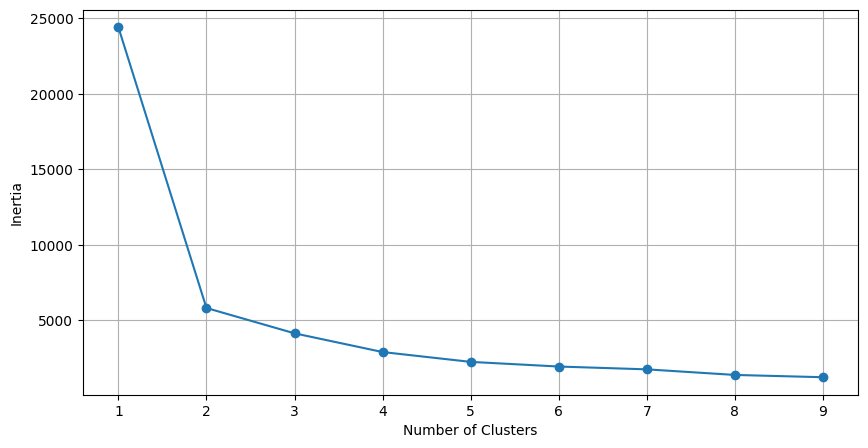

In [ ]:
#Generate the elbow plot

optimise_k_means(df[['RHOB', 'NPHI']], 10)

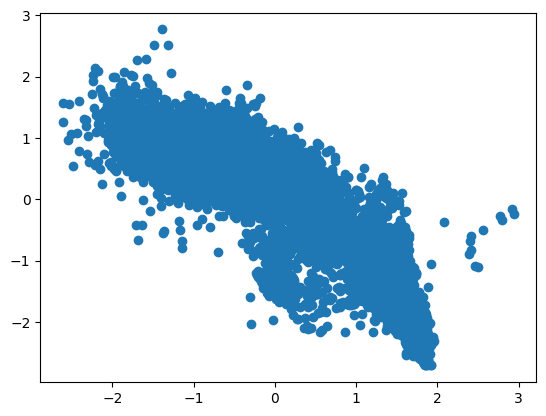

In [ ]:
plt.scatter(df["RHOB"], df["NPHI"])

In [ ]:
km = KMeans(n_clusters=3)

In [ ]:
y_pred = km.fit_predict(df[["RHOB","NPHI"]])

In [ ]:
y_pred

array([2, 2, 2, ..., 1, 1, 1], dtype=int32)

In [ ]:
df["Cluster"] = y_pred

In [ ]:
df.head()

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,2
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,2
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,2
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,2
4242,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,2


In [ ]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,2
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,2
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,2
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,2
4242,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,2
...,...,...,...,...,...,...,...
16435,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,1
16436,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,1
16437,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,1
16438,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,1


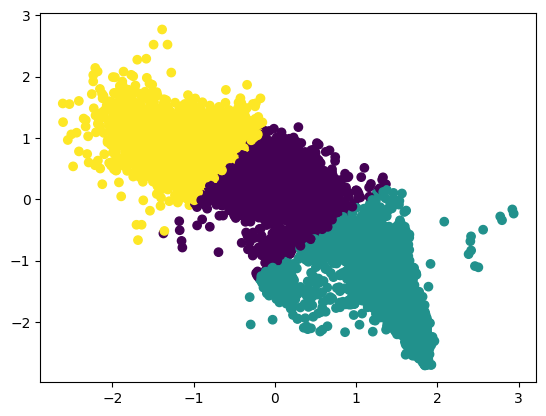

In [ ]:
plt.scatter(x=df["RHOB"], y=df["NPHI"], c=df["Cluster"])
plt.show()

In [ ]:
for k in range(1, 6):
    kmeans=KMeans(n_clusters=k)
    kmeans.fit(df[['RHOB', 'NPHI']])
    df [f'KMeans_{k}'] = kmeans. labels_

In [ ]:
df

,RHOB,GR,DEPTH_MD,NPHI,PEF,DTC,Cluster,KMeans_1,KMeans_2,KMeans_3,KMeans_4,KMeans_5
4238,-1.491843,-0.179292,-1.731605,2.523654,-1.255364,0.869531,2,0,0,0,2,4
4239,-1.387067,-0.010859,-1.731322,2.770744,-1.247886,0.690042,2,0,0,0,2,4
4240,-1.320646,0.028875,-1.731038,2.524300,-1.247450,0.554350,2,0,0,0,2,4
4241,-1.274390,-0.008126,-1.730754,2.068584,-1.261572,0.585297,2,0,0,0,2,4
4242,-1.335919,-0.092056,-1.730470,1.617342,-1.325067,0.752808,2,0,0,0,2,4
...,...,...,...,...,...,...,...,...,...,...,...,...
16435,1.265151,0.979338,1.730512,-0.524699,0.433103,-1.149449,1,0,1,1,3,2
16436,1.222550,0.921870,1.730796,-0.456081,0.433103,-1.158891,1,0,1,1,3,2
16437,1.110101,1.032560,1.731080,-0.356250,0.433103,-1.105910,1,0,1,1,3,2
16438,1.095199,1.157682,1.731363,-0.339430,0.722114,-1.095690,1,0,1,1,3,2


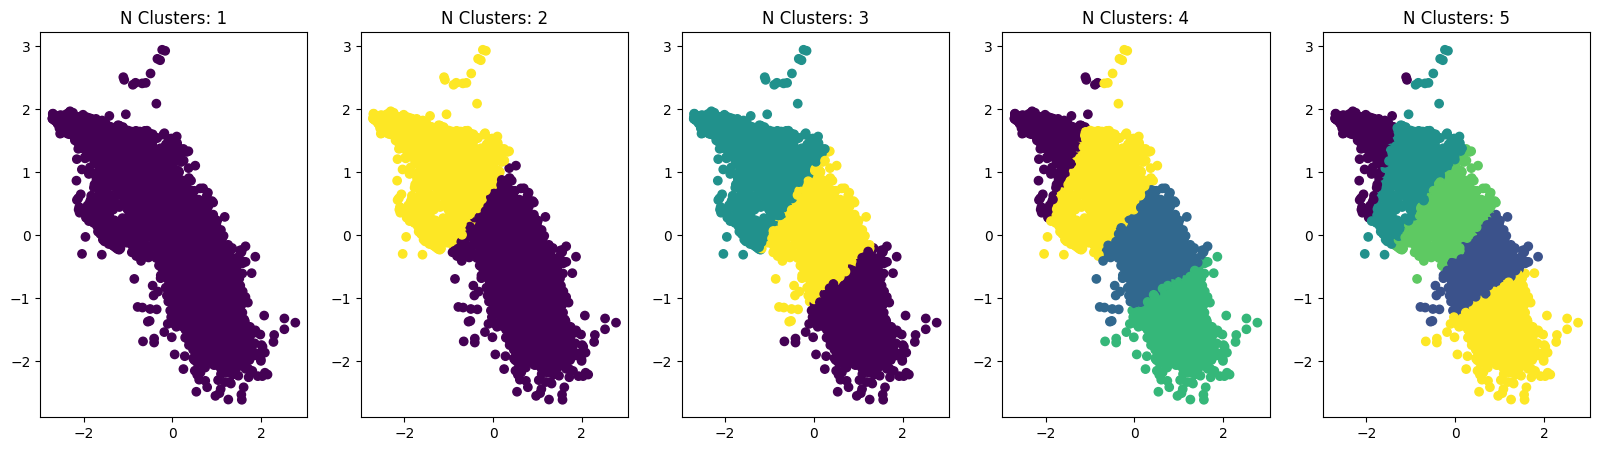

In [ ]:
fig, axs = plt.subplots(nrows=1, ncols=5, figsize=(20,5))

for i, ax in enumerate(fig.axes, start=1):
    ax. scatter(x=df ['NPHI' ], y=df ['RHOB'], c=df[f'KMeans_{i}'])
    ax.set_title(f'N Clusters: {i}')